# Data Visualization
As part of this module I will quickly walk through some of the capabilities of Matplotlib library to visualize our data.

* Getting Started
* Attributes of a Graph
* Overview of LinkedIn Data
* Prepare LinkedIn Data (Contacts)
* Bar Chart - Contact Count by Source
* Prepare LinkedIn Data (Connections)
* Plot using loops
* Histogram
* Pie Chart
* Stack Plot
* Plotting using Pandas

## Getting Started
There are several libraries for visualization.
* Popular Visualization Libraries.
  * Matplotlib
  * Plotly
  * Seaborn
  * Pandas
* We can validate whether `matplotlib` exists or not. If it does not exists we can install using `python -m pip install matplotlib`.
* We need to import `pyplot` from `matplotlib`

In [ ]:
from matplotlib import pyplot as plt

* We can invoke pyplot's `plot` function to create line graph by passing values for x axis and y axis in the same order.

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

* `pyplot` have function to define labels for x axis and y axis (`xlabel` and `ylabel`)

In [ ]:
plt.xlabel('x')
plt.ylabel('x square')

* We can apply all the required attributes and then invoke `show` to get more intuitive graph.

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.xlabel('x')
plt.ylabel('x square')
plt.show()

In [ ]:
import seaborn as sb

In [ ]:
sb.load_dataset?

In [ ]:
import pandas as pd
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]
d = {'x': x, 'x-square': y}
df = pd.DataFrame(d)

In [ ]:
ax = sb.lineplot(x='x', y='x-square', data=df)

## Attributes of a graph

Here are some of the attributes of a graph.
* x-axis and y-axis
* Data in x-axis and y-axis
* Labels for x-axis and y-axis
* At times we might want to display multiple line graphs, in which case we can create legends to define the purpose of each line graph. 

In [ ]:
from matplotlib import pyplot as plt
x1 = [1, 2, 3, 4]
y1 = [2, 4, 6, 8]
x2 = [1, 2, 3, 4]
y2 = [3, 6, 9, 12]

plt.plot(x1, y1)
plt.plot(x2, y2)

plt.xlabel('x')
plt.ylabel('x-multiple')

plt.show()

In [ ]:
from matplotlib import pyplot as plt
x1 = [1, 2, 3, 4]
y1 = [2, 4, 6, 8]
x2 = [1, 2, 3, 4]
y2 = [3, 6, 9, 12]

plt.plot(x1, y1, label='x-double')
plt.plot(x2, y2, label='x-triple')

plt.xlabel('x')
plt.ylabel('x-multiple')

plt.legend()

plt.show()

#### Using Seaborn
* Seaborn takes x-axis, y-axis and data in the form Data Frame

In [2]:
x1 = [1, 2, 3, 4]
y1 = [2, 4, 6, 8]
y2 = [3, 6, 9, 12]

d = {'x': x1, 'x-double': y1, 'x-triple': y2}

In [3]:
import pandas as pd
df = pd.DataFrame(d)
df

,x,x-double,x-triple
0,1,2,3
1,2,4,6
2,3,6,9
3,4,8,12


In [4]:
df.columns

Index(['x', 'x-double', 'x-triple'], dtype='object')

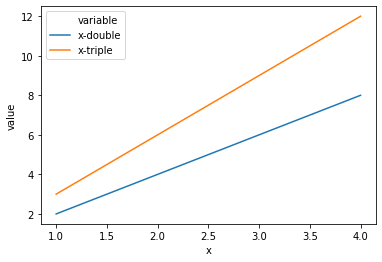

In [6]:
import seaborn as sb

ax = sb.lineplot(x='x', y='value', hue='variable', data=pd.melt(df, ['x']))

#### Plotting using Pandas

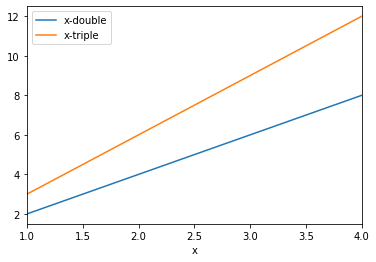

In [13]:
df.plot(x='x')

## Overview of LinkedIn Data
Let me explain you about the LinkedIn Data that is being used as part of the demo.
* LinkedIn provides data archive on request.
* It contains all the data related to us.
* Contacts contain all the contacts which LinkedIn got from our mail boxes.
* Connections reflect data from our connections. 
* I have downloaded my data archive and masked names and email ids for this demo.
* We will be using plots, histograms, bar charts etc to visualize using LinkedIn data.

## Prepare LinkedIn Data (Contacts)

Let us prepare LinkedIn Data to visualize using Matplot lib.
* Read data from the files using Pandas.
* We want to plot bar graph using number of contacts from each source.
* Logic can be built using Pandas APIs.

In [14]:
base_dir = '/Users/itversity/Research/data/linkedin'
source_file = '{base_dir}/{file_name}'

In [15]:
import pandas as pd

contacts_src = source_file.format(
    base_dir = base_dir,
    file_name = 'Contacts.csv'
)

contacts = pd.read_csv(contacts_src).astype(str)
contacts.head()

,Source,FirstName,LastName,Companies,Title,Emails,PhoneNumbers,CreatedAt,Addresses,Sites,InstantMessageHandles,FullName,Birthday,Location,BookmarkedAt,Profiles
0,USER_CREATE,0d65de5e9753379f,6b9a44d428e7cc2e,nan,nan,"35a8197725738947@gmail.com, 49a395f8ac58f1c6@y...",nan,"7/29/13, 9:53 AM",nan,nan,nan,nan,nan,nan,nan,nan
1,USER_CREATE,20a8d21852e26649,d4b121c2beb6669c,nan,nan,"e89691701d047de0@gmail.com, e4abee738229efa9@g...",nan,"7/29/13, 9:53 AM",nan,nan,nan,nan,nan,nan,nan,nan
2,USER_CREATE,b6c2990ad9b1cfd6,22cfa364779977df,nan,nan,"5460e1735173d418@dell.com, 9bee4ea66df84b7b@gm...",nan,"7/29/13, 9:53 AM",nan,nan,nan,nan,nan,nan,nan,nan
3,USER_CREATE,b7f0228d36feca92,c797083392ee2a70,nan,nan,"f88558683408fa1d@coveventure.com, 13ef4ca54015...",nan,"11/25/15, 7:18 AM",a3e9061733fb1439,nan,215137815ee015e0,nan,nan,nan,nan,nan
4,USER_CREATE,a90e0e1942a4b359,dbd7539b91612104,nan,nan,"1c9b4985d183ec76@wachovia.com, 1c9b4985d183ec7...",nan,"1/29/15, 9:39 AM",nan,nan,nan,nan,nan,nan,nan,nan


In [16]:
contacts_count_by_source = contacts. \
    groupby(contacts['Source'])['Source']. \
    count()
contacts_count_by_source

Source
ABOOK_IMPORT          10
FILE_UPLOAD         1587
GOOGLE_CONTACTS    12838
IPHONE_CALENDAR       49
MOBILE_CONTACTS     1964
USER_CREATE            6
Name: Source, dtype: int64

## Plot Contact Count by Source
Let us understand how we can plot using data from Data Frame.
* Take the data from contacts_count_by_source.
* It is of type Series. Series will have index and values.
* In our case index is nothing but contact source and values is nothing but count for each source.

In [17]:
type(contacts_count_by_source)

pandas.core.series.Series

In [18]:
contacts_count_by_source.index.tolist()

['ABOOK_IMPORT',
 'FILE_UPLOAD',
 'GOOGLE_CONTACTS',
 'IPHONE_CALENDAR',
 'MOBILE_CONTACTS',
 'USER_CREATE']

In [19]:
contacts_count_by_source.values.tolist()

[10, 1587, 12838, 49, 1964, 6]

* Let us plot contact source on x-axis and count on y-axis.
* Let us also define labes for x and y axes.

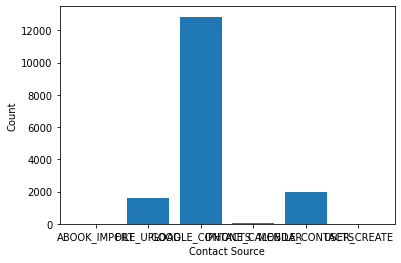

In [20]:
from matplotlib import pyplot as plt
plt.bar(contacts_count_by_source.index.tolist(), 
         contacts_count_by_source.values.tolist()
        )
plt.xlabel('Contact Source')
plt.ylabel('Count')
plt.show()

* Contact Source is not rendered properly due to lack of space.
* We can improvise by rotating the contact source names using `xticks` for values on x-axis.

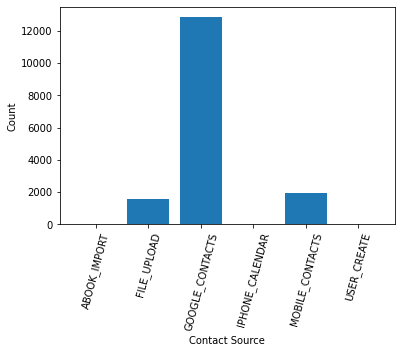

In [21]:
plt.bar(contacts_count_by_source.index.tolist(), 
         contacts_count_by_source.values.tolist()
        )
plt.xlabel('Contact Source')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

In [22]:
import seaborn as sb

df = contacts_count_by_source.reset_index(name='Connection Count')
labels = df['Source'].tolist()

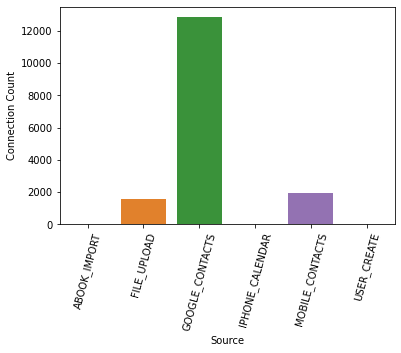

In [23]:
ax = sb.barplot(x='Source', y='Connection Count', data=df)
ax = ax.set_xticklabels(labels=labels, rotation=75)

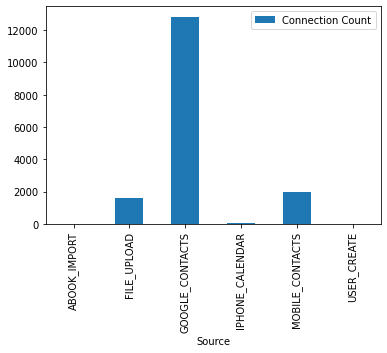

In [24]:
df.plot(kind='bar', x='Source')

## Prepare LinkedIn Data (Connections)

We will use Connections data for plotting line graph using multiple dependent variables.
* Read Connections data.
* Here is the problem statement.
  * Let us plot all the months from 2017 January to 2018 December on x-axis.
  * Let us plot the monthly connection count for top 2 companies.
* We need to ensure that the months are sorted properly.
* We need to get connection count per organization and sort data by count in descending order to see top organizations.
* We also need to get the monthly count for each of the selected organizations

* Reading Connection data

In [26]:
base_dir = '/Users/itversity/Research/data/linkedin'
source_file = '{base_dir}/{file_name}'

In [27]:
import pandas as pd

connections_src = source_file.format(
    base_dir = base_dir,
    file_name = 'Connections.csv'
)

connections = pd.read_csv(connections_src).astype(str)

* Filtering for 2017 and 2018 data.

In [28]:
connections = connections. \
    query('`Connected On`.str.contains("2017") or `Connected On`.str.contains("2018")', engine='python')
connections.head()

,First Name,Last Name,Email Address,Company,Position,Connected On
2432,dcdbd5ee9cc84b07,c836f47cefaed87a,nan,Virtusa,Senior Consultant,31 Dec 2018
2433,1b48dd706a05529d,9f020a84886ab17e,nan,Bayer,Data Analytics Lead,31 Dec 2018
2434,81bd075bec50b585,13750ce1b05934ad,nan,Confidential,Program/Engagement Director - Innovation & En...,31 Dec 2018
2435,15be3b238e4156c2,d12a54842ad66bc6,nan,Concirrus,Team Lead (Quest Marine Hull) and Sr. Data Ana...,31 Dec 2018
2436,b8c9f0200a5342eb,20c7831ec03d8c85,nan,"Oalva, Inc.",Hadoop Administrator,31 Dec 2018


* Getting count by organization

In [29]:
connection_count_by_company = connections.groupby('Company')['Company'].count()
connection_count_by_company

Company
     www.ibridz.com    1
 -                     2
 - BSM Group -         1
 --------              1
 -----------           1
                      ..
上海证券公司                 1
新奥集团                   1
日立咨询                   1
泽方企业管理咨询有限公司           1
甲骨文                    1
Name: Company, Length: 8584, dtype: int64

In [30]:
type(connection_count_by_company)

pandas.core.series.Series

In [31]:
connection_count_by_company[connection_count_by_company.ge(50) == True]

Company
Accenture                     166
Amazon                         53
Capgemini                     149
Citi                           55
Cognizant                     299
Confidential                   74
DXC Technology                 58
Deloitte                       55
EY                             52
HCL Technologies              104
IBM                           127
Infosys                       184
JPMorgan Chase & Co.           53
Microsoft                      52
Oracle                         65
Tata Consultancy Services     351
Tech Mahindra                  86
Wipro Limited                  68
nan                          1084
Name: Company, dtype: int64

In [32]:
connection_count_by_company.sort_values(ascending=False)

Company
nan                          1084
Tata Consultancy Services     351
Cognizant                     299
Infosys                       184
Accenture                     166
                             ... 
Peterbilt Motors Company        1
Petrikore Marketing             1
PharmaACE                       1
Pharmaceutical MNC              1
     www.ibridz.com             1
Name: Company, Length: 8584, dtype: int64

* Filter for Cognizant and count by month

In [33]:
connections[connections['Company'] == 'Cognizant'].head()

,First Name,Last Name,Email Address,Company,Position,Connected On
2652,9b681fa78fa3dc37,3b55eacd33c74667,nan,Cognizant,Project Associate,17 Dec 2018
2668,df3e9a753762f58b,88f043c3a7ca8b4f,nan,Cognizant,Programmer,15 Dec 2018
2674,d552a86183653ec5,8b88f724365cb18a,nan,Cognizant,Associate,15 Dec 2018
2818,a62716ed9a820f06,a3b4c1e1ee716a6b,nan,Cognizant,Lead Architect,25 Nov 2018
2826,c21745b409f4c19c,ffe08227ab51600d,nan,Cognizant,Associate,25 Nov 2018


In [34]:
import datetime
connections['Connected Month'] = connections['Connected On']. \
    apply(lambda d: datetime.datetime. \
          strptime(d, '%d %b %Y'). \
          strftime('%Y-%m')
         )

In [35]:
connections.head()

,First Name,Last Name,Email Address,Company,Position,Connected On,Connected Month
2432,dcdbd5ee9cc84b07,c836f47cefaed87a,nan,Virtusa,Senior Consultant,31 Dec 2018,2018-12
2433,1b48dd706a05529d,9f020a84886ab17e,nan,Bayer,Data Analytics Lead,31 Dec 2018,2018-12
2434,81bd075bec50b585,13750ce1b05934ad,nan,Confidential,Program/Engagement Director - Innovation & En...,31 Dec 2018,2018-12
2435,15be3b238e4156c2,d12a54842ad66bc6,nan,Concirrus,Team Lead (Quest Marine Hull) and Sr. Data Ana...,31 Dec 2018,2018-12
2436,b8c9f0200a5342eb,20c7831ec03d8c85,nan,"Oalva, Inc.",Hadoop Administrator,31 Dec 2018,2018-12


In [36]:
connections_cognizant = connections.query('Company == "Cognizant"')
connections_cognizant.head()

,First Name,Last Name,Email Address,Company,Position,Connected On,Connected Month
2652,9b681fa78fa3dc37,3b55eacd33c74667,nan,Cognizant,Project Associate,17 Dec 2018,2018-12
2668,df3e9a753762f58b,88f043c3a7ca8b4f,nan,Cognizant,Programmer,15 Dec 2018,2018-12
2674,d552a86183653ec5,8b88f724365cb18a,nan,Cognizant,Associate,15 Dec 2018,2018-12
2818,a62716ed9a820f06,a3b4c1e1ee716a6b,nan,Cognizant,Lead Architect,25 Nov 2018,2018-11
2826,c21745b409f4c19c,ffe08227ab51600d,nan,Cognizant,Associate,25 Nov 2018,2018-11


In [37]:
connections_cognizant_by_month = connections_cognizant. \
    groupby('Connected Month')['Connected Month'].count()
connections_cognizant_by_month.head()

Connected Month
2017-01    18
2017-02    21
2017-03    31
2017-04    36
2017-05    14
Name: Connected Month, dtype: int64

* Filter for TCS and get count by Month

In [38]:
connections_tcs = connections.query('Company == "Tata Consultancy Services"')
connections_tcs.head()

,First Name,Last Name,Email Address,Company,Position,Connected On,Connected Month
2486,928e1273ab7b5bd7,1eb3d2c06687558d,nan,Tata Consultancy Services,Big Data Developer,28 Dec 2018,2018-12
2505,e065b88d88554890,afa3fd5761b3249d,nan,Tata Consultancy Services,Big Data Developer,26 Dec 2018,2018-12
2528,1105430bf40f2e0d,b8716546fcad37d7,nan,Tata Consultancy Services,Assistant System Engineer,25 Dec 2018,2018-12
2609,4c176d9f43f7980c,a818e3578b06113b,nan,Tata Consultancy Services,System Engineer,21 Dec 2018,2018-12
2610,49a46d1a4c39accd,fd5257b709efe43c,nan,Tata Consultancy Services,Big data engineer,21 Dec 2018,2018-12


In [39]:
connections_tcs_by_month = connections_tcs. \
    groupby('Connected Month')['Connected Month'].count()
connections_tcs_by_month.head()

Connected Month
2017-01    26
2017-02    10
2017-03    44
2017-04    38
2017-05    14
Name: Connected Month, dtype: int64

## Plot Connection Count by Organization
Let us understand the lifecycle of plotting multiple line graphs.
* Define x and y axes
* Plot for top 2 organizations with labels.
* Define x and y labels.
* Rotate the months on x-axis.
* Display the graph

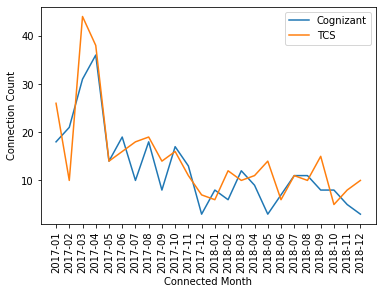

In [40]:
from matplotlib import pyplot as plt

x1 = connections_cognizant_by_month.index.to_list()
x2 = connections_tcs_by_month.index.to_list()
y1 = connections_cognizant_by_month.values.tolist()
y2 = connections_tcs_by_month.values.tolist()

plt.plot(x1, y1, label='Cognizant')
plt.plot(x2, y2, label='TCS')
plt.xlabel('Connected Month')
plt.ylabel('Connection Count')

plt.xticks(rotation=90)

plt.legend()
plt.show()

In [41]:
base_dir = '/Users/itversity/Research/data/linkedin'
source_file = '{base_dir}/{file_name}'

import pandas as pd

connections_src = source_file.format(
    base_dir = base_dir,
    file_name = 'Connections.csv'
)

connections = pd.read_csv(connections_src).astype(str)

connections_orgs2 = connections. \
    query('''(`Connected On`.str.contains("2017") \
    or `Connected On`.str.contains("2018")) \
    and Company.isin(['Cognizant', 'Tata Consultancy Services'])
    ''', engine='python')
connections_orgs2.head()

,First Name,Last Name,Email Address,Company,Position,Connected On
2486,928e1273ab7b5bd7,1eb3d2c06687558d,nan,Tata Consultancy Services,Big Data Developer,28 Dec 2018
2505,e065b88d88554890,afa3fd5761b3249d,nan,Tata Consultancy Services,Big Data Developer,26 Dec 2018
2528,1105430bf40f2e0d,b8716546fcad37d7,nan,Tata Consultancy Services,Assistant System Engineer,25 Dec 2018
2609,4c176d9f43f7980c,a818e3578b06113b,nan,Tata Consultancy Services,System Engineer,21 Dec 2018
2610,49a46d1a4c39accd,fd5257b709efe43c,nan,Tata Consultancy Services,Big data engineer,21 Dec 2018


In [42]:
import datetime
connections_orgs2['Connected Month'] = connections_orgs2['Connected On']. \
    apply(lambda d: datetime.datetime. \
          strptime(d, '%d %b %Y'). \
          strftime('%Y-%m')
         )
connections_orgs2.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,First Name,Last Name,Email Address,Company,Position,Connected On,Connected Month
2486,928e1273ab7b5bd7,1eb3d2c06687558d,nan,Tata Consultancy Services,Big Data Developer,28 Dec 2018,2018-12
2505,e065b88d88554890,afa3fd5761b3249d,nan,Tata Consultancy Services,Big Data Developer,26 Dec 2018,2018-12
2528,1105430bf40f2e0d,b8716546fcad37d7,nan,Tata Consultancy Services,Assistant System Engineer,25 Dec 2018,2018-12
2609,4c176d9f43f7980c,a818e3578b06113b,nan,Tata Consultancy Services,System Engineer,21 Dec 2018,2018-12
2610,49a46d1a4c39accd,fd5257b709efe43c,nan,Tata Consultancy Services,Big data engineer,21 Dec 2018,2018-12


In [43]:
df = connections_orgs2.groupby(['Connected Month', 'Company'])['Connected Month']. \
    count(). \
    reset_index(name='Connection Count')
df_pivot = pd. \
    pivot_table(df, 
                index=['Connected Month'], 
                columns=['Company']
               ). \
    reset_index()
df_pivot.columns = df_pivot.columns.droplevel()
df_pivot = df_pivot.rename(columns={'': 'Connected Month'})
df_pivot.columns.name = None
df_pivot.head()

,Connected Month,Cognizant,Tata Consultancy Services
0,2017-01,18,26
1,2017-02,21,10
2,2017-03,31,44
3,2017-04,36,38
4,2017-05,14,14


In [44]:
df_pivot.columns

Index(['Connected Month', 'Cognizant', 'Tata Consultancy Services'], dtype='object')

In [45]:
labels = df_pivot['Connected Month'].tolist()

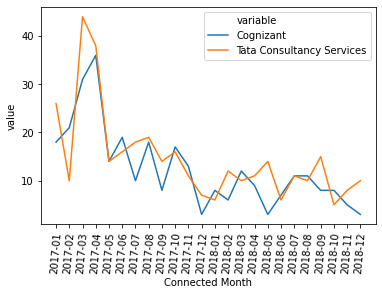

In [46]:
import seaborn as sb
ax = sb.lineplot(x='Connected Month', 
                 y='value', 
                 hue='variable', 
                 data=pd.melt(df_pivot, ['Connected Month'])
                )
ax = ax.set_xticklabels(labels=labels, rotation=85)

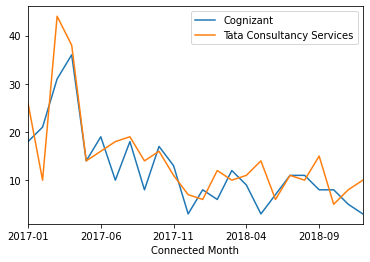

In [48]:
df_pivot.plot(x='Connected Month')

## Plot using loops
Let us understand how to plot using loops.
* We will get top 5 organizations by connection count.
* We will get count by month for the years of 2017 and 2018 for top 5 organizations.
* Once we get counts by month for top 5 organizations, we should be able to plot for all organizations using loop.

* Get top 5 organization by connection count

In [49]:
organizations_top5 = connection_count_by_company[connection_count_by_company.index != 'nan']. \
    sort_values(ascending=False). \
    head(5)
organizations_top5

Company
Tata Consultancy Services    351
Cognizant                    299
Infosys                      184
Accenture                    166
Capgemini                    149
Name: Company, dtype: int64

* Get the connections for top 5 organizations

In [50]:
connections_top5 = connections[
    connections['Company'].isin(organizations_top5.index.tolist())
]
connections_top5

,First Name,Last Name,Email Address,Company,Position,Connected On
0,3078a0ab1e55097b,7efe64fafaa00172,nan,Tata Consultancy Services,Big Data Architect,14 Aug 2019
4,b52d63a6f034471c,bea75ca0d82da8df,nan,Tata Consultancy Services,Consultant,14 Aug 2019
7,1e16fa2700b5df9c,812138456cf852ae,nan,Accenture,Associate Software Engineer,14 Aug 2019
10,66628dcf41e81390,0028b6f056a85256,nan,Infosys,Technology Architect,14 Aug 2019
11,5b2e58b89248a863,29a5437a9d5d5d2d,d84a8fde0a937830@gmail.com,Tata Consultancy Services,Senior Data Engineer,14 Aug 2019
...,...,...,...,...,...,...
23359,f7e6eab615ee67f9,fef3b905062d2125,nan,Accenture,"Manager, Big Data Engineering Architecture",18 Dec 2009
23368,a7c7b20921721f8f,e2a1b9533bf1fb8f,nan,Accenture,Associate Manager,07 Nov 2009
23489,8e628ac7b78d114b,942070c5a021e63f,nan,Infosys,Technical Architect,09 Aug 2008
23520,34e01dd548e4b9a8,14c50f053d929dbc,nan,Infosys,Programmer Analyst,13 Apr 2008


* Get count by month for each of the top 5 organizations (for the years of 2017 as well as 2018).
* It will result in multiindex (Company and Connected Month).

In [52]:
import datetime
connections_top5['Connected Month'] = connections_top5['Connected On']. \
    apply(lambda d: datetime.datetime. \
          strptime(d, '%d %b %Y'). \
          strftime('%Y-%m')
         )
connections_orgs2.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,First Name,Last Name,Email Address,Company,Position,Connected On,Connected Month
2486,928e1273ab7b5bd7,1eb3d2c06687558d,nan,Tata Consultancy Services,Big Data Developer,28 Dec 2018,2018-12
2505,e065b88d88554890,afa3fd5761b3249d,nan,Tata Consultancy Services,Big Data Developer,26 Dec 2018,2018-12
2528,1105430bf40f2e0d,b8716546fcad37d7,nan,Tata Consultancy Services,Assistant System Engineer,25 Dec 2018,2018-12
2609,4c176d9f43f7980c,a818e3578b06113b,nan,Tata Consultancy Services,System Engineer,21 Dec 2018,2018-12
2610,49a46d1a4c39accd,fd5257b709efe43c,nan,Tata Consultancy Services,Big data engineer,21 Dec 2018,2018-12


In [60]:
connections_top5_count_by_month = connections_top5. \
    query('`Connected On`.str.contains("2017") or `Connected On`.str.contains("2018")'). \
    groupby(["Company", "Connected Month"])["Connected Month"]. \
    count()
connections_top5_count_by_month

Company                    Connected Month
Accenture                  2017-01            14
                           2017-02             9
                           2017-03            19
                           2017-04            18
                           2017-05            10
                                              ..
Tata Consultancy Services  2018-08            10
                           2018-09            15
                           2018-10             5
                           2018-11             8
                           2018-12            10
Name: Connected Month, Length: 119, dtype: int64

* We can use `index.get_level_values` to get values from multiindex columns.
* Here is the example to filter for **Accenture** using first column in multiindex.

In [61]:
connections_top5_count_by_month[
    connections_top5_count_by_month.index.get_level_values(0) == 'Accenture'
]
connections_top5_count_by_month.head()

Company    Connected Month
Accenture  2017-01            14
           2017-02             9
           2017-03            19
           2017-04            18
           2017-05            10
Name: Connected Month, dtype: int64

* We can use `organizations_top5` to get the organization names so that we can plot for each of the five organizations.

In [62]:
for org in organizations_top5.index.to_list():
    print(org)

Tata Consultancy Services
Cognizant
Infosys
Accenture
Capgemini


* Example for plotting using loops.

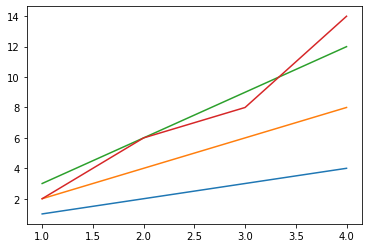

In [63]:
import matplotlib.pyplot as plt
x=[[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]]
y=[[1,2,3,4],[2,4,6,8],[3,6,9,12],[2,6,8,14]]
plt.figure()
for i in range(len(x)):
    plt.plot(x[i],y[i])
    # Show/save figure as desired.
plt.show()

* Plotting for top 5 organizations using monthly counts for 2017 and 2018.

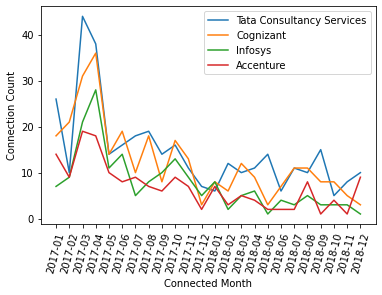

In [64]:
from matplotlib import pyplot as plt

for org in organizations_top5.index.to_list()[:4]:
    data = connections_top5_count_by_month[
        connections_top5_count_by_month.index.get_level_values(0) == org
    ]
    x = data.index.get_level_values(1).to_list()
    y = data.values.tolist()
    plt.plot(x, y, label=org)

plt.xlabel("Connected Month")
plt.ylabel("Connection Count")

plt.legend()
plt.xticks(rotation=75)
plt.show()

In [65]:
base_dir = '/Users/itversity/Research/data/linkedin'
source_file = '{base_dir}/{file_name}'

import pandas as pd

connections_src = source_file.format(
    base_dir = base_dir,
    file_name = 'Connections.csv'
)

connections = pd.read_csv(connections_src).astype(str)

import datetime
connections['Connected Month'] = connections['Connected On']. \
    apply(lambda d: datetime.datetime. \
          strptime(d, '%d %b %Y'). \
          strftime('%Y-%m')
         )

connection_count_by_company = connections. \
    query('''`Connected On`.str.contains("2017")''', engine='python'). \
    groupby('Company')['Company']. \
    count()

organizations_top5 = connection_count_by_company[connection_count_by_company.index != 'nan']. \
    sort_values(ascending=False). \
    head(5)

connections_top5 = connections[
    (connections['Company'].isin(organizations_top5.index.tolist())) &
    (connections['Connected On'].str.contains('2017'))
]

connections_top5_count_by_month = connections_top5. \
    groupby(["Company", "Connected Month"])["Connected Month"]. \
    count(). \
    reset_index(name='Connection Count')

df_pivot = pd. \
    pivot_table(connections_top5_count_by_month, 
                index=['Connected Month'], 
                columns=['Company']
               ). \
    reset_index()
df_pivot.columns = df_pivot.columns.droplevel()
df_pivot = df_pivot.rename(columns={'': 'Connected Month'})
df_pivot.columns.name = None
df_pivot.head()

,Connected Month,Accenture,Capgemini,Cognizant,Infosys,Tata Consultancy Services
0,2017-01,14,15,18,7,26
1,2017-02,9,7,21,9,10
2,2017-03,19,14,31,21,44
3,2017-04,18,15,36,28,38
4,2017-05,10,9,14,11,14


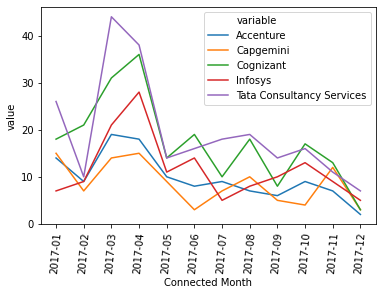

In [66]:
labels = df_pivot['Connected Month'].tolist()

import seaborn as sb
ax = sb.lineplot(x='Connected Month', 
                 y='value', 
                 hue='variable', 
                 data=pd.melt(df_pivot, ['Connected Month'])
                )
ax = ax.set_xticklabels(labels=labels, rotation=85)

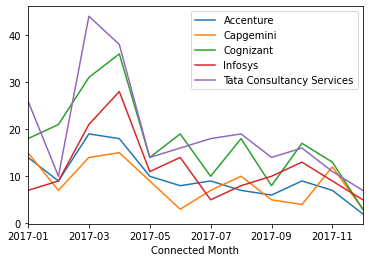

In [67]:
df_pivot.plot(x='Connected Month')

## Bar Graphs

Let us understand how to plot bar graph.

In [ ]:
# Get top 5 organizations for year 2017
import pandas as pd

connections_src = source_file.format(
    base_dir = base_dir,
    file_name = 'Connections.csv'
)

connections = pd.read_csv(connections_src).astype(str)
connections = connections. \
    query('`Connected On`.str.contains("2017")')
connections

In [ ]:
connections_count = connections.groupby('Company')['Company'].count()
top_organizations = connections_count[(connections_count.ge(100) == True) & (connections_count.index != 'nan')]

In [ ]:
from matplotlib import pyplot as plt
organizations = top_organizations.index.to_list()
cnt = top_organizations.values.tolist()
plt.bar(organizations, cnt, width=0.45)

plt.xlabel("Organization Name")
plt.ylabel("Connection Count")

plt.xticks(rotation=60)
plt.show()

## Plotting Histograms

Let us plot histograms when we have too many independent variables.
* We will create bins or buckets for plotting histograms using fewer buckets.
* We will try to plot 2 histograms.
  * Organization count with 100 t0 600 conections.
  * Organization count with 10 to 50 connections.

In [ ]:
import pandas as pd

connections_src = source_file.format(
    base_dir = base_dir,
    file_name = 'Connections.csv'
)

connections = pd.read_csv(connections_src).astype(str)
connections = connections. \
    query('Company != "nan"')
connections

In [ ]:
connections.count()

In [ ]:
import numpy as np
connections.replace('nan', np.NaN). \
    count()

In [ ]:
connections_count_by_org = connections. \
    groupby('Company')['Company']. \
    count()

In [ ]:
connections_count_by_org = connections_count_by_org[connections_count_by_org.ge(100) == True]
connections_count_by_org

In [ ]:
from matplotlib import pyplot as plt

connection_counts = connections_count_by_org.values.tolist()

plt.hist(connection_counts, 
         bins=list(range(100, 601, 100)),
         rwidth=0.8,
         label='Top Organizations'
        );

plt.xlabel('Connection Count')
plt.ylabel('Organization Count')

plt.legend()
plt.show()

In [ ]:
import pandas as pd

connections_src = source_file.format(
    base_dir = base_dir,
    file_name = 'Connections.csv'
)

connections = pd.read_csv(connections_src).astype(str)
connections = connections. \
    query('Company != "nan"')
connections

In [ ]:
connections_count_by_org = connections. \
    groupby('Company')['Company']. \
    count()

In [ ]:
connections_count_by_org = connections_count_by_org[
    (connections_count_by_org.ge(10) == True) & 
    (connections_count_by_org.le(50) == True)
]
connections_count_by_org

In [ ]:
from matplotlib import pyplot as plt

connection_counts = connections_count_by_org.values.tolist()

plt.hist(connection_counts, 
         bins=range(10, 51, 10),
         rwidth=0.8,
         label='Moderate Organizations'
        )

plt.xlabel('Connection Count')
plt.ylabel('Organization Count')

plt.legend()
plt.show()

In [ ]:
connections.query("`Connected On`.str.endswith('2018')", engine='python')

## Pie Chart

Let us understand how to build pie chart to understand the distribution of number of connections by year.

In [ ]:
d = {'Scala': 280, 'Java': 650, 'Python': 550, 'Java Script': 425}
labels = d.keys()
values = d.values()

from matplotlib import pyplot as plt
plt.pie(values, 
        explode=[0.1, 0.1, 0.1, 0.1],
        labels=labels,
        startangle=45,
        autopct='%1.2f%%'
       )

plt.legend(title='languages',
           loc='upper right',
           bbox_to_anchor=(1, 0, 0.5, 1)
          )
plt.show()

Now let us render pie chart using LinkedIn data.
* Get connection count by year
* Render pie chart using year as label
* As there are many years with very few connections, we will consider all the years under 1000 connections as Other
* Render pie chart using year for all the years with more than 1000 connections and Other for rest of the years
* We need to pre-compute connection count for Other years than those years which have greater than or equal to 1000.

In [ ]:
import datetime
connections['Connected Year'] = connections['Connected On']. \
    apply(lambda d: datetime.datetime. \
          strptime(d, '%d %b %Y'). \
          strftime('%Y')
         )
connections.head()

In [ ]:
connections_count_yearly = connections. \
    groupby(['Connected Year'])['Connected Year']. \
    count()
connections_count_yearly

In [ ]:
from matplotlib import pyplot as plt
labels = connections_count_yearly.index.tolist()
values = connections_count_yearly.values.tolist()

plt.pie(values, 
        labels=labels,
        autopct='%1.1f%%'
       )
plt.show()

In [ ]:
connections_count_yearly[connections_count_yearly.values <= 1000].sum()

In [ ]:
ccy_ge_1000 = connections_count_yearly[connections_count_yearly.values >= 1000]

In [ ]:
ccy_ge_1000['Other'] = connections_count_yearly[connections_count_yearly.values < 1000].sum()

In [ ]:
ccy_ge_1000

In [ ]:
from matplotlib import pyplot as plt
labels = ccy_ge_1000.index.tolist()
values = ccy_ge_1000.values.tolist()

plt.pie(values, 
        labels=labels,
        explode=list(map(lambda e: 0.2 if e == 'Other' else 0.0, labels)),
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops=dict(width=0.66)
       )
plt.show()

## Using Stack Plots

Let us understand how to render stack plot using matplot library.
* Stack Plots are primarily used to compare and understand the spread.
* We will see the spread and compare the top 5 organizations.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y1 = [1, 1, 2, 3, 5]
y2 = [0, 4, 2, 6, 8]
y3 = [1, 3, 5, 7, 9]

y = np.vstack([y1, y2, y3])

labels = ["Fibonacci ", "Evens", "Odds"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, labels=labels)
ax.legend(loc='upper left')
plt.show()

In [ ]:
import pandas as pd

connections_src = source_file.format(
    base_dir = base_dir,
    file_name = 'Connections.csv'
)

connections = pd.read_csv(connections_src).astype(str)
connections.head()

In [ ]:
import datetime
connections['Connected Year'] = connections['Connected On']. \
    apply(lambda d: datetime.datetime. \
          strptime(d, '%d %b %Y'). \
          strftime('%Y')
         )
connections.head()

In [ ]:
connections[connections['Connected Year']. \
                  isin(['2016', '2017', '2018', '2019'])
           ]. \
    head()

In [ ]:
orgs_top5 = connections[(connections['Connected Year']. \
                        isin(['2016', '2017', '2018', '2019'])) &
                        (connections['Company'] != 'nan')
                       ]. \
    groupby('Company')['Company']. \
    count(). \
    sort_values(ascending=False). \
    index. \
    tolist()[:5]
orgs_top5

In [ ]:
connections_top5 = connections[(connections['Company'].isin(orgs_top5)) &
                               (connections['Connected Year']. \
                                isin(['2016', '2017', '2018', '2019'])
                               )
                              ]
connections_top5.head()

In [ ]:
connections_top5. \
    groupby(["Connected Year", "Company"])["Company"]. \
    count(). \
    head(5)

In [ ]:
connections_count_top5 = connections_top5. \
    groupby(["Connected Year", "Company"])["Company"]. \
    count(). \
    reset_index(name="Connection Count"). \
    sort_values(by=['Connected Year', 'Company'])
connections_count_top5.head(10)

In [ ]:
connections_count_top5_sp = connections_count_top5. \
    groupby("Company")['Connected Year']. \
    apply(list). \
    reset_index()
connections_count_top5_sp

In [ ]:
connections_count_top5_sp['Connection Count'] = connections_count_top5. \
    groupby('Company')['Connection Count']. \
    apply(list). \
    values
connections_count_top5_sp

In [ ]:
x = connections_count_top5_sp['Connected Year'][0]
x

In [ ]:
companies = connections_count_top5_sp['Company'].tolist()
companies

In [ ]:
cnt = connections_count_top5_sp['Connection Count'].tolist()
cnt

In [ ]:
plt.stackplot(x, cnt, labels=companies)
plt.legend(loc='upper right',
           bbox_to_anchor=(1, 0, 0.05, 1)
          )
plt.show()

In [ ]:
connections_count_top5.head()

## Plotting using Pandas

Pandas also provide APIs for visualization.
* We can use Data Frame's T.plot to plot different types of charts and graphs.

In [ ]:
df_pivot = pd. \
    pivot_table(connections_count_top5, 
                index=['Connected Year'], 
                columns=['Company']
               ). \
    reset_index()
df_pivot.columns = df_pivot.columns.droplevel()
df_pivot = df_pivot.rename(columns={'': 'Connected Year'})
df_pivot.columns.name = None
df_pivot.head()

In [ ]:
df_pivot.set_index('Connected Year').T.plot(kind='bar')

In [ ]:
df_pivot.set_index('Connected Year').T.plot(kind='bar', stacked=True)

In [ ]:
df_pivot.set_index('Connected Year').T.plot(kind='area', stacked=True)